In [173]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [174]:
data = pd.read_csv("weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [175]:
data['Height'] = data['Height'] * 2.54
data['Weight'] = data['Weight'] / 2.205

data

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


In [176]:
data = data.replace(["Male" , "Female"] , [1,0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <a list of 10 Patch objects>)

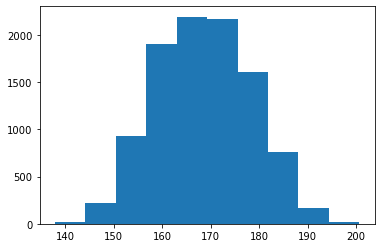

In [177]:
plt.hist(data['Height'])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <a list of 10 Patch objects>)

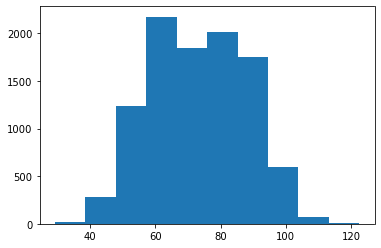

In [178]:
plt.hist(data['Weight'])

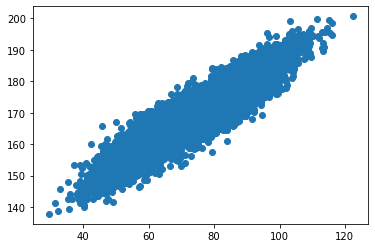

In [179]:
plt.scatter(data['Weight'] , data['Height'])

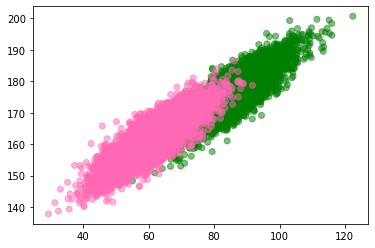

In [180]:
colors = ['hotpink' ,'green'  ]

plt.scatter(data['Weight'] , data['Height'] , c=data["Gender"] , cmap =ListedColormap(colors) , alpha=0.5)

In [181]:
X_train = np.array([data['Weight'] , data['Height']]).T
X_train.shape

Y_train = np.array(data['Gender'])
Y_train.shape

(10000,)

In [182]:
class KNearestNeighbors:
    def __init__(self, k) :
        self.k = k



    # train       
    def fit(self , X_train , Y_train):
        self.X_train = X_train
        self.Y_train = Y_train


    # fasle oghlidosi
    def eucilidianDstance(self, a,b):
        d = np.sqrt(np.sum((a-b)**2))
        return d


    #near neighbors
    def nearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
            dist = self.eucilidianDstance(x_train , X_test)
            dists.append(dist)

        index_sorted = np.argsort(dists)
        gender_sorted = self.Y_train[index_sorted]
        return gender_sorted[0:self.k]

    def evalute(self, X_test , Y_test):
        c =0
        for i , test in enumerate(range(len(X_test))):
            preduct = self.predict(test)
            if preduct[i] == Y_test[i]:
                c +=1  
        accuracy = c/len(Y_test)
        return accuracy
        
    # test 
    def predict(self,X_test):

        neighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(neighbors))
        return Y_test

In [183]:
knn = KNearestNeighbors(k=5)
# k=3

# data haro balade alan 
#knn.fit(X_train , Y_train)

#X_test = np.array([122,40])
#answer = knn.predict(X_test )

#answer

In [184]:
X_train , X_test , y_train , y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=4)
len(X_test)

2000

In [185]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(pred,y_test)
accuracy

0.923